In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np

In [5]:
data = json.loads(open("time_diffs2.json").read())
llm_times = pd.Series(data["llm_times"])
tts_times = pd.Series(data["stt_times"])
stt_times = pd.Series(data["tts_times"])
sent_audio_times = pd.Series(data["sent_audio_times"])
recieved_audio_times = pd.Series(data["recieved_audio_times"])
send_times = pd.Series(data["send_times"])
receive_times = pd.Series(data["receive_times"])

In [6]:
tts_times.count(), sent_audio_times.count(), recieved_audio_times.count(), send_times.count(), receive_times.count(), llm_times.count(), stt_times.count()

(36, 49, 36, 48, 36, 400, 49)

In [7]:
data = {
    "LLM Times": llm_times,
    "TTS Times": tts_times,
    "STT Times": stt_times,
    # "Audio Times": audio_times,
    "Send Times": send_times,
    "Receive Times": receive_times,
}

# Cria um DataFrame com os dados
df = pd.DataFrame(data)

In [8]:
df.describe()

,LLM Times,TTS Times,STT Times,Send Times,Receive Times
count,400.000000,36.000000,49.000000,48.000000,36.000000
mean,83.990848,591.524308,847.152880,2.801050,25.677092
std,136.287370,232.409339,354.950187,3.892335,47.489280
min,-1.000000,406.600900,360.595500,0.000000,0.000000
25%,0.000000,460.524875,634.944600,0.000000,9.091200
50%,0.000000,529.740900,781.211500,1.997850,15.992000
75%,124.048000,626.863800,896.816400,3.001925,30.750475
max,1510.028000,1590.922700,2238.810600,16.024000,286.677900


In [9]:
z_scores = (df - df.mean(skipna=True)) / df.std(skipna=True)

# Filtra os valores cujo Z-Score absoluto seja menor ou igual a 3
filtered_df = df[(np.abs(z_scores) <= 3).all(axis=1)]

# Exibe o DataFrame filtrado
filtered_df.describe()

,LLM Times,TTS Times,STT Times,Send Times,Receive Times
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,85.023788,537.896497,847.442121,2.128233,17.401027
std,88.401653,99.461818,318.042912,2.868555,15.790583
min,-1.000000,406.600900,360.595500,0.000000,0.000000
25%,0.000000,460.212500,695.343500,0.000000,6.998100
50%,116.723600,521.310900,787.878100,1.895100,15.970300
75%,125.176800,594.732100,896.816400,2.998100,28.324600
max,342.265900,817.216100,1899.720700,14.041600,62.565300


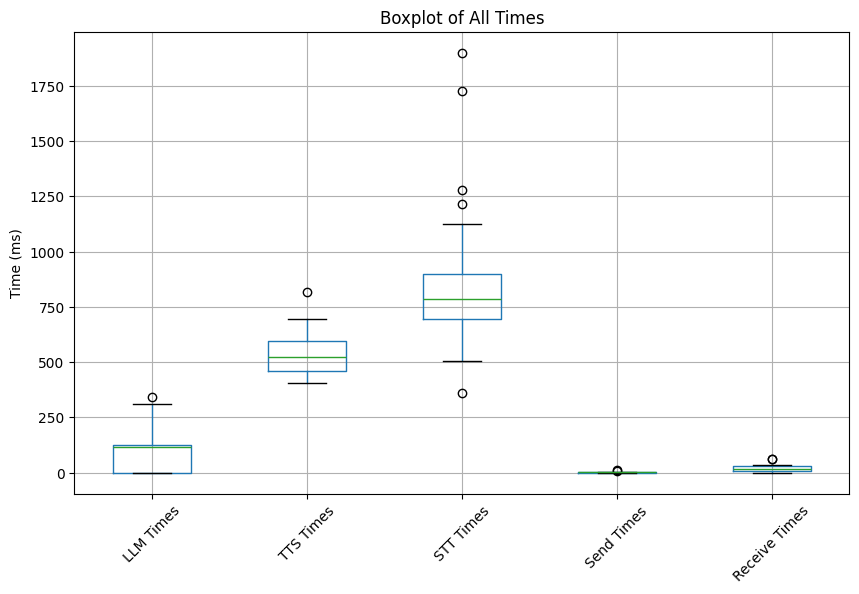

In [10]:
# Gera um único boxplot indexado
plt.figure(figsize=(10, 6))
filtered_df.boxplot()
plt.title("Boxplot of All Times")
plt.ylabel("Time (ms)")
plt.xticks(rotation=45)
plt.show()